In [39]:
import matplotlib.pyplot as plt
import os
import numpy as np
import glob

In [43]:
ENVS = ['walker-walk','cheetah-run','cartpole-swing']
AGENTS = ['rad_sac', 'pixel_sac']

data = {}
for env in ENVS:
    data[env] = dict()
    for agent in AGENTS:
        data[env][agent] = []
        for f in glob.glob(f'results/{env}*{agent}*'):
            new_data = np.load(os.path.join(f, 'shiftability_data.npy'), allow_pickle=True)[()]
            data[env][agent].append(new_data)

['results/walker-walk-10-18-s0-rad_sac-withDA']

In [8]:
dir_withDA = 'results/walker-walk-10-18-s0-rad_sac-withDA'
dir_withoutDA = 'results/walker-walk-10-19-s0-pixel_sac-withoutDA'

In [15]:
withDA = np.load(os.path.join(dir_withDA, 'shiftability_data.npy'), allow_pickle=True)[()]
withoutDA = np.load(os.path.join(dir_withoutDA, 'shiftability_data.npy'), allow_pickle=True)[()]

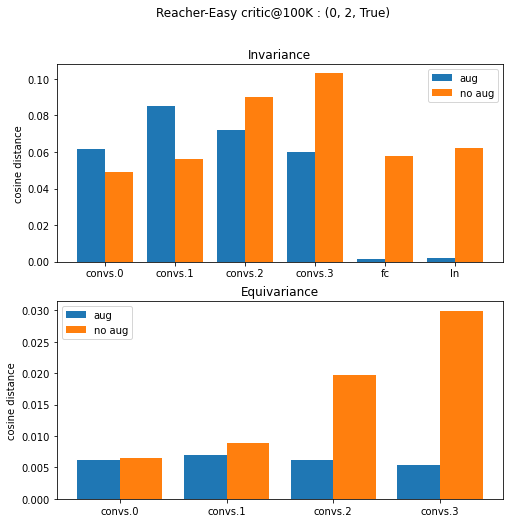

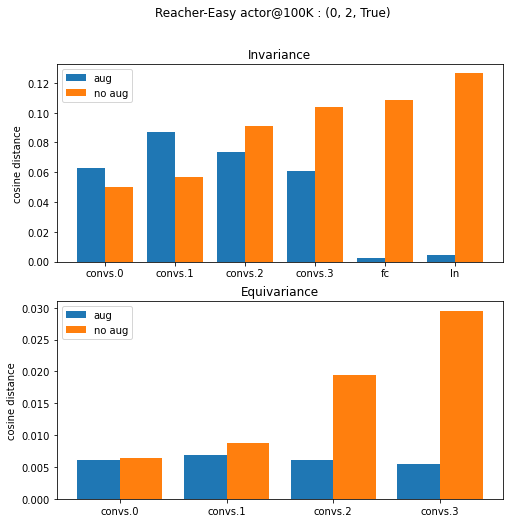

In [45]:
network = 'actor'
aug_param = (0,2)
aug_param = (1,4)
# aug_param = (4,6,False)

def plot_invariance(withDA, withoutDA, network, aug_param):
    f, ax = plt.subplots(2, 1, figsize=(8,8))
    plt.suptitle(f'Reacher-Easy {network}@100K : {aug_param}')

    w = 0.4
    for i, name in enumerate(['inv', 'equiv']):
        aug = withDA[network][aug_param][name]
        no_aug = withoutDA[network][aug_param][name]

        x_axis = np.arange(len(aug))
        ax[i].bar(x_axis - w/2, list(aug.values()), w, label='aug')
        ax[i].bar(x_axis + w/2, list(no_aug.values()), w, label='no aug')

        ax[i].set_xticks(x_axis)
        ax[i].set_xticklabels(list(aug.keys()))
        ax[i].legend()

        ax[i].set_title({'equiv':'Equivariance', 'inv':'Invariance'}[name])
        ax[i].set_ylabel('cosine distance')

plot_invariance(withDA, withoutDA, 'critic', aug_param)
plot_invariance(withDA, withoutDA, 'actor', aug_param)
    
    
    
    